Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję $Z(w_{TV}, w_{radio}, w_{prasa})$. Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki (MSE) dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące. Jak bardzo różnią się wyniki na zbiorze uczącym i testującym?

In [21]:
import pandas as pd
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv('advertising.csv')
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
models = [
    (MLPRegressor(hidden_layer_sizes=(60,60,60,60,60), activation='relu', max_iter=10000), '5 warstw po 60 neuronów (ReLU)'),
    (MLPRegressor(hidden_layer_sizes=(80,80,80,80,80,80,80,80,80,80,80,80), activation='relu', max_iter=10000), '12 warstw po 80 neuronów (ReLU)'),
    (MLPRegressor(hidden_layer_sizes=(60,60,60,60,60), activation='tanh', max_iter=10000), '5 warstw po 60 neuronów (tanh)'),
    (MLPRegressor(hidden_layer_sizes=(80,80,80,80,80,80,80,80,80,80,80,80), activation='tanh', max_iter=10000), '12 warstw po 80 neuronów (tanh)'),
]
for model, name in models:
    print(f'\n{name}:')
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(f'MSE (test): {mean_squared_error(y_test, y_pred_test)}')
    print(f'MSE (train): {mean_squared_error(y_train, y_pred_train)}')


5 warstw po 60 neuronów (ReLU):
MSE (test): 2.0069737231431066
MSE (train): 0.37473534529917724

12 warstw po 80 neuronów (ReLU):
MSE (test): 0.8304531546563872
MSE (train): 0.2714358219034815

5 warstw po 60 neuronów (tanh):
MSE (test): 1.0064615208926226
MSE (train): 0.375935845834133

12 warstw po 80 neuronów (tanh):
MSE (test): 19.651500908027394
MSE (train): 28.990757267073366


**Wnioski:** Roznica miedzy zbiorami testowymi a uczącymi jest znacząca, co moze wskazywać na przetrenowanie modelu. 
Modele z aktywacją ReLU osiągały lepsze wyniki na obydwu zbiorach.
Modele z większą liczbą warstw i neuronów osiągają lepsze wyniki na zbiorze uczącym, ale gorsze na zbiorze testowym, w porównaniu do modeli z mniejszą liczbą warstw i neuronów. 
Może to sugerować, że większe modele są bardziej skłonne do przetrenowania

Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji $f(x) = cos(x)$ w przedziale $[-2\pi,2\pi]$. Proszę użyć $tanh$ jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

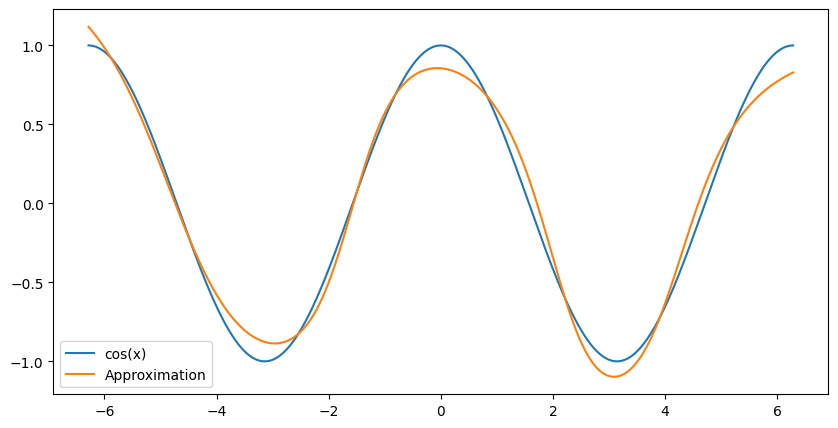

y = tanh(0.549 + -0.344*tanh(-0.029x + -1.220) + 0.383*tanh(-0.903x + -1.064) + -0.764*tanh(-0.032x + -1.066) + -0.333*tanh(0.663x + -0.800))


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
y = np.cos(x)
model = MLPRegressor(hidden_layer_sizes=(4,4,4,4,4), activation='tanh', max_iter=10000, tol=0.001, random_state=1)
model.fit(x, y.ravel())
y_pred = model.predict(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='cos(x)')
plt.plot(x, y_pred, label='Approximation')
plt.legend()
plt.show()
hidden_layer_weights = model.coefs_[0]
output_layer_weights = model.coefs_[1]
hidden_layer_biases = model.intercepts_[0]
output_layer_bias = model.intercepts_[1][0]
print(f"y = tanh({model.intercepts_[1][0]:.3f}", end="")
for index in range(len(model.coefs_[0][0])):
    print(f" + {model.coefs_[0][0][index]:.3f}*tanh({model.coefs_[1][index][0]:.3f}x + {model.intercepts_[0][index]:.3f})", end="")
print(")")

**Wnioski:**
Mimo że sieć jest stosunkowo mała (z jedną warstwą ukrytą), jest w stanie skutecznie aproksymować złożoną funkcję.
Wagi i biasy sieci neuronowej, dostępne jako network.coefs_ i network.intercepts_ zmieniają się podczas procesu uczenia, dopasowując sieć do danych treningowych.

Proszę pobrać zbiór Boston housing (jest w formacie excelowym, w dokumentacji znajdą państwo linka jak pobrać go w pandas). Zawiera nieznormalizowane dane dotyczące mediany wartości mieszkań w różnych obszarach stanu Massachusetts wokół Bostonu, takie jak współczynnik przestępczości, ilość uczniów na nauczyciela, zanieczyszczenie powietrza itp. W ostatniej kolumnie znajduje się mediana wartości mieszkania na tym obszarze. Proszę znormalizować dane, a następnie zaproponować kilka wielowarstowych sieci neuronowych i ocenić jak dobrze dokonają aproksymacji funkcji mediany wartości mieszkań za pomocą opisanych dzisiaj metryk. Proszę spróbować osiągnąć jak najlepszy wynik (jak najniższe MSE). Wyniki oczywiście proszę sprawdzać na danych testujących.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

data = pd.read_excel('Boston_Housing.xlsx')
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
models = [
    MLPRegressor(hidden_layer_sizes=(10,), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(50,), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(100,), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(200,), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(400,), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000, random_state=1),
    MLPRegressor(hidden_layer_sizes=(200, 200), max_iter=10000, random_state=1)
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model {model.hidden_layer_sizes}: MSE = {mse}")

Model (10,): MSE = 12.12444782471032
Model (50,): MSE = 11.203286066262432
Model (100,): MSE = 11.737797678809931
Model (200,): MSE = 11.060881125647931
Model (400,): MSE = 9.115441559684017
Model (10, 10): MSE = 12.429688541019425
Model (50, 50): MSE = 10.079893467461542
Model (100, 100): MSE = 9.496607103737531
Model (200, 200): MSE = 8.947087314947401


**Wnioski:** Modele z większą liczbą neuronów w jednej warstwie ukrytej osiągają lepsze wyniki (mniejsze MSE) niż modele z mniejszą liczbą neuronów.
Podobnie jak w przypadku modeli z jedną warstwą ukrytą, modele z większą liczbą neuronów w dwóch warstwach ukrytych osiągają lepsze wyniki niż modele z mniejszą liczbą neuronów.
Modele z dwiema warstwami ukrytymi generalnie osiągają lepsze wyniki niż modele z jedną warstwą ukrytą.
Najlepiej działał model z dwoma warstwami ukrytymi, kazda po 200 neuronów

Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz uzyskanych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

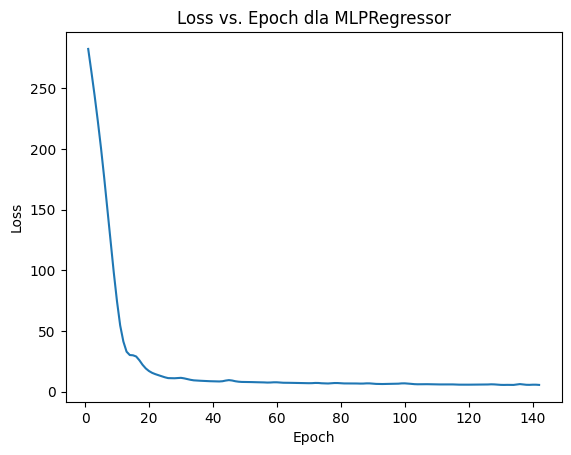

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

data = pd.read_excel('Boston_Housing.xlsx')
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = MLPRegressor(hidden_layer_sizes=(200,200), max_iter=10000, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
epochs = range(1, model.n_iter_ + 1)
plt.plot(epochs, model.loss_curve_, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch dla MLPRegressor')
plt.show()

**Wnioski:** 
Na podstawie wykresu możemy zauważyć, że strata modelu generalnie maleje wraz z liczbą epok, co sugeruje, że model uczy się i poprawia swoją wydajność, ale po pewnym punkcie, strata zaczyna się stabilizować, co sugeruje, że model zaczyna osiągać swoje limity wydajności na tych danych.

Proszę sprawdzić wyniki regresji dla zbioru boston housing dla różnych podziałów na dane uczące i testujące (dla co najmniej pięciu podziałów 15-85, 40-60, 50-50, 60-40, 85-15) i wyciągnąć wnioski.

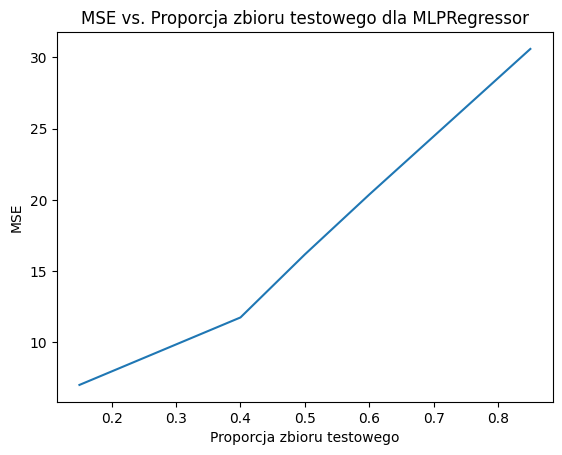

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

data = pd.read_excel('Boston_Housing.xlsx')
X, y = data.iloc[:, :-1], data.iloc[:, -1]
scaler = StandardScaler()
X = scaler.fit_transform(X)
splits = [0.15,0.4,0.5,0.6,0.85]
mses = []
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=2)
    model = MLPRegressor(hidden_layer_sizes=(200, 200), max_iter=10000, random_state=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
plt.plot(splits, mses)
plt.xlabel('Proporcja zbioru testowego')
plt.ylabel('MSE')
plt.title('MSE vs. Proporcja zbioru testowego dla MLPRegressor')
plt.show()

**Wnioski:** Wraz ze wzrostem wielkości zbioru testowego, błąd MSE generalnie rośnie. Model ma mniej danych do nauki więc popełnia więcej błędów.
Najlepszy podział (najmniejsze MSE) to 85% danych do nauki i 15% danych do testowania.


Można spróbować (już po normalizacji) zmniejszyć wymiarowość zbioru boston housing. Żeby to osiągnąć, opcją jest np. odrzucić pierwsze dwie kolumny, albo dokonać zmniejszenia wymiarowości powszechnie używanym algorytmem PCA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, w dokumentacji są przykłady użycia). Wtedy można zbadać jak zmieni się działanie sieci po takim zabiegu.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

data = pd.read_excel('Boston_Housing.xlsx')
X, y = data.iloc[:, :-1], data.iloc[:, -1]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_pca = mean_squared_error(y_test, y_pred)
X_drop = X[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_drop = mean_squared_error(y_test, y_pred)
print(f"MSE z PCA: {mse_pca}")
print(f"MSE z usunięciem dwóch pierwszych kolumn: {mse_drop}")
print(f"MSE bez zmiany: {mse}")

MSE z PCA: 17.91296745322846
MSE z usunięciem dwóch pierwszych kolumn: 11.58663830481837
MSE bez zmiany: 9.452126901244764


**Wnioski:** Użycie PCA do redukcji wymiarowości danych prowadzi do najgorszych wyników (najwyższe MSE). 
To sugeruje, że podczas procesu PCA niektóre ważne informacje mogą być tracone.
Usunięcie dwóch pierwszych kolumn prowadzi do lepszych wyników niż PCA, ale gorszych niż brak zmian. 
Sugeruje to, ze są tam wazne informacje bez których model gorzej sobie radzi.